In [1]:
# Import required packages
from os import path 
import time
from datetime import datetime
import numpy as np
import pandas as pd
import torch
from torch import nn, Tensor
from torch.optim import AdamW
from tqdm import tqdm, trange
import zuko
from zuko.flows import Distribution, NSF
from zuko.distributions import DiagNormal, BoxUniform, Minimum
from zuko.flows import DistributionModule, FlowModule, Unconditional
from hnne import HNNE

from utils.settings import config
from utils.utils import *
from utils.model import *
from utils.robot import Robot

In [2]:
panda = Robot(verbose=False)
# data generation
X, y = load_data(robot=panda)
# build dimension reduction model
hnne, ds, loader = get_hnne_model(X, y)
# Build Generative model, NSF
# Neural spline flow (NSF) with 3 sample features and 5 context features
flow, optimizer, scheduler = get_flow_model()

hnne load successfully from ./weights/panda/hnne.pickle
Finding nearest centroids to new data...
Setting up once a knn index for the last level centroids...
Wed May 24 19:09:06 2023 Building RP forest with 32 trees
Wed May 24 19:09:11 2023 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Wed May 24 19:11:04 2023 Worst tree score: 0.94777330
Wed May 24 19:11:04 2023 Mean tree score: 0.94833276
Wed May 24 19:11:04 2023 Best tree score: 0.94882578
Wed May 24 19:11:08 2023 Forward diversification reduced edges from 20009880 to 6167085
Wed May 24 19:11:10 2023 Reverse diversification reduced edges from 6167085 to 6167085
Wed May 24 19:11:13 2023 Degree pruning reduced edges from 6697868 to 6697868
Wed May 24 19:11:13 2023 Resorting data and graph based on tree order
Wed May 24 19:11:13 2023 Building and compiling search function
Projecting data...
Model load successfully from ./weights/panda/nsf.pth


,l2_err,log_prob
count,2400.000000,2400.000000
mean,0.007193,-9.076507
std,0.015491,2.228963
min,0.000319,-20.857088
25%,0.003201,-10.604031
50%,0.005094,-9.386731
75%,0.007724,-7.890635
max,0.364450,1.028378


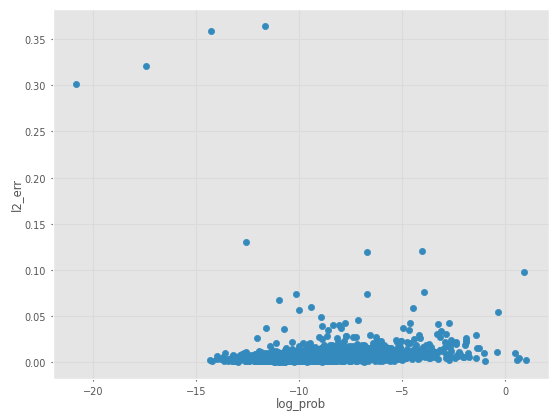

In [3]:
df, err = test_l2_err(config, robot=panda, loader=loader, model=flow)
ax1 = df.plot.scatter(x='log_prob', y='l2_err')
df.describe()

,l2_err,log_prob
count,2400.000000,2400.000000
mean,0.008377,inf
std,0.021802,NaN
min,0.000195,-17.028019
25%,0.002670,-14.575122
50%,0.004355,-13.828914
75%,0.006930,-12.869115
max,0.402545,inf


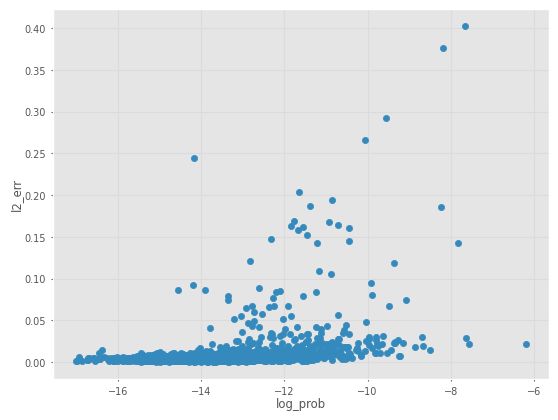

In [4]:
nflow = get_nflow_model(flow=flow)
df, err = test_l2_err(config, robot=panda, loader=loader, model=nflow)
ax1 = df.plot.scatter(x='log_prob', y='l2_err')
df.describe()

In [5]:
traj_dir = sample_ee_traj(robot=panda, load_time='')

100%|██████████| 20/20 [00:00<00:00, 10545.08it/s]

mkdir ./data/panda/trajectory/05241912
./data/panda/trajectory/05241912/ load successfully.


In [7]:
generate_traj_via_model(hnne=hnne, num_traj=3, model=nflow, robot=panda, traj_dir=traj_dir)

(array([], dtype=int64),)
[]
0.13862507252573042
(array([], dtype=int64),)
[]
0.08516021022673573
(array([0]),)
[0.22661683]
0.3235521218907117
